1. Загрузите картинку parrots.jpg. Преобразуйте изображение, приведя все значения в интервал от 0 до 1. Для этого можно воспользоваться функцией img_as_float из модуля skimage. Обратите внимание на этот шаг, так как при работе с исходным изображением
вы получите некорректный результат

In [72]:
from skimage.io import imread
import numpy as np
from skimage.util import img_as_float

image = imread('parrots.jpg')
image = img_as_float(image)
image_shape = image.shape

2. Создайте матрицу объекты-признаки: характеризуйте каждый пиксель тремя координатами - значениями интенсивности в пространстве RGB.

In [73]:
image = image.reshape(image.shape[0]*image.shape[1], image.shape[2])

3. Запустите алгоритм K-Means с параметрами init=’k-means++’ и
random_state=241. После выделения кластеров все пиксели, отнесенные в один кластер, попробуйте заполнить двумя способами:
медианным и средним цветом по кластеру

In [74]:
from sklearn.cluster import KMeans

kmeans = KMeans(init='k-means++', random_state=241)
preds = kmeans.fit_predict(image)

s = [0] * 8
n = [0] * 8
mean_colors = []
colors_per_cluster = [[] for _ in range(8)]


for i in range(len(preds)):
    cluster = preds[i]
    s[cluster] += image[i]
    n[cluster] += 1
    colors_per_cluster[cluster].append(image[i])

for i in range(len(s)):
    mean_colors.append(s[i] / n[i])

median_colors = [np.median(colors_per_cluster[i], axis=0) for i in range(8)]



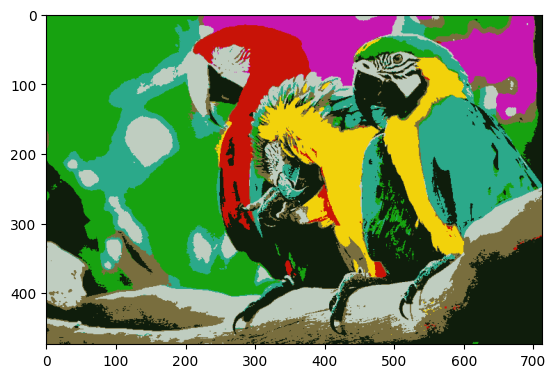

In [75]:
from matplotlib import pyplot as plt

image_mean_coloring = []
image_median_coloring = []

for i in range(len(preds)):
    cluster = preds[i]
    image_mean_coloring.append(mean_colors[cluster])
    image_median_coloring.append(median_colors[cluster])


image_means = np.array(image_mean_coloring).reshape(image_shape)
plt.imshow(image_means)


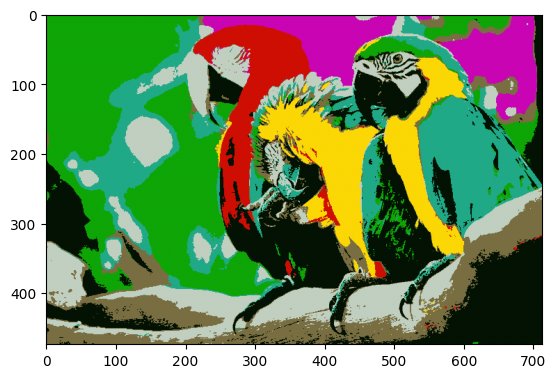

In [76]:
image_medians = np.array(image_median_coloring).reshape(image_shape)
plt.imshow(image_medians)

4. Измерьте качество получившейся сегментации с помощью метрики
PSNR. Эту метрику нужно реализовать самостоятельно (см. определение)

In [77]:
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    max_pixel = 1
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

In [78]:
print(PSNR(image.reshape(image_shape), image_means))
print(PSNR(image.reshape(image_shape), image_medians))


18.381478900862174
18.104902948364753


5. Найдите минимальное количество кластеров, при котором значение PSNR выше 20 (можно рассмотреть не более 20 кластеров, но
не забудьте рассмотреть оба способа заполнения пикселей одного
кластера). Это число и будет ответом в данной задаче

In [79]:
for num in range(2, 20):
    kmeans = KMeans(init='k-means++', random_state=241, n_clusters=num)
    preds = kmeans.fit_predict(image)
    s = [0] * num
    n = [0] * num
    mean_colors = []
    colors_per_cluster = [[] for _ in range(num)]


    for i in range(len(preds)):
        cluster = preds[i]
        s[cluster] += image[i]
        n[cluster] += 1
        colors_per_cluster[cluster].append(image[i])

    for i in range(len(s)):
        mean_colors.append(s[i] / n[i])

    median_colors = [np.median(colors_per_cluster[i], axis=0) for i in range(num)]
    image_mean_coloring = []
    image_median_coloring = []

    for i in range(len(preds)):
        cluster = preds[i]
        image_mean_coloring.append(mean_colors[cluster])
        image_median_coloring.append(median_colors[cluster])

    image_means = np.array(image_mean_coloring).reshape(image_shape)
    image_medians = np.array(image_median_coloring).reshape(image_shape)

    psnr_mean = PSNR(image.reshape(image_shape), image_means)
    psnr_median = PSNR(image.reshape(image_shape), image_medians)

    if psnr_mean > 20 or psnr_median > 20:
        print(f'Количество необходимых класетров для PSNR > 20 = {num}')
        break
    

Количество необходимых класетров для PSNR > 20 = 11
